# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df


,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [76]:
df=pd.DataFrame(df,columns=['i','k','solution','gcd','n','smax'])

In [79]:
#df['solution'] = df[abs(n) for n in solution]

SyntaxError: invalid syntax (<ipython-input-79-76ce15f88940>, line 1)

In [70]:
a=abs(df.solution.apply(max))# toma el valor maximo de las listas soluciones

df['smax']=a
df

,i,k,solution,gcd,n,smax
0,NaN,"[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,NaN,"[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,NaN,"[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5
3,NaN,"[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,NaN,"[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7
...,...,...,...,...,...,...
390069,NaN,"[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,NaN,"[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,NaN,"[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31
390072,NaN,"[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [171]:
b=(df.solution.apply(sum))# Maximo de las lista solución
#suma
df['sum_s']=b 
df['sum_s³']=b**3 #cubo de la suma 
np.random.seed(1086418061)
a = np.random.randint(1,390073); print(a)

144683


In [172]:
z=df.iloc[a] #Se escoge la fila aleatoria
z

l                                            [-3, 2, 1, 2]
k                                       [-1, -3, 1, -2, 1]
solution    [3, -4, 8, 11, -18, 19, -21, 25, -26, -29, 32]
gcd                                                      2
n                                                       11
sum_s                                                    0
sum_s³                                                   0
Name: 144683, dtype: object

In [135]:
nn=z['solution'] #Escoge la fila solución

In [136]:
#l=[1,4,4,6,8,3] #lista con números

p = np.poly1d(nn) #polinomio con el número.
print(p)

r=p.roots #Raíz del polinomio
print (r)
#print(p(r[1]))

dp=p.deriv() #Derivada del polinomio
print(dp)

   10     9     8      7      6      5      4      3      2
3 x  - 4 x + 8 x + 11 x - 18 x + 19 x - 21 x + 25 x - 26 x - 29 x + 32
[ 0.79905722+1.83863012j  0.79905722-1.83863012j -1.63790759+0.j
 -0.50606031+1.08136887j -0.50606031-1.08136887j -0.83284172+0.j
  0.68475659+1.06750321j  0.68475659-1.06750321j  1.        +0.j
  0.84857564+0.j        ]
    9      8      7      6       5      4      3      2
30 x - 36 x + 64 x + 77 x - 108 x + 95 x - 84 x + 75 x - 52 x - 29


C:\Users\JAMER_PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


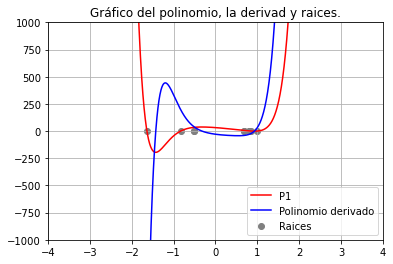

In [141]:
x=np.linspace(-10,10,5000) #Definir puntos en x
plt.figure()
plt.title('Gráfico del polinomio, la derivad y raices.')
plt.plot(x,p(x),"r-", label="P1") #Grafica de el polinomio y el polinomio derivado
plt.plot(x,dp(x), "b-", label="Polinomio derivado"  )
plt.scatter(r, p(r), color='gray', label='Raices' ) #Muestra las raices en el gráfico
plt.xlim(-4,4)
plt.ylim(-1000,1000) #Optimizar el gráfico

plt.legend()
plt.grid()

plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [153]:
np.random.seed(1086418061) #Se usa como semilla mi número de cédula.
a = np.random.randint(1,6); print(a) #Forma aleatoria para número entero y se escoge la función
P = np.random.rand(); print(P) #Número aleatorio

2
0.624488543665644


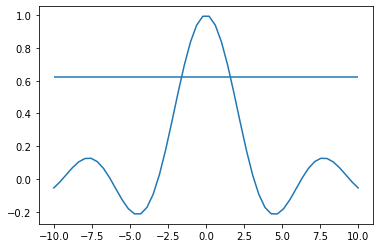

In [185]:
x = np.linspace(-10,10)
y = np.sin(x)/x 
plt.plot(x,y)
plt.hlines(P,-10,10)
plt.show()

In [165]:
def  sec(f,p0,p1,eps,Nmax): #Método secante para encontrar las raices

    q0 = f(p0)
    q1 = f(p1)
    i = 2
    while i<Nmax:
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        print (i, p, f(p))  
 
        if ( np.abs(p - p1) < eps ): break 
        i += 1

        p0 = p1; q0 = q1
        p1 = p; q1 = f(p)
        if (i == Nmax): print ("el método fallo")
    return p

In [166]:
f = lambda x :(np.sin(x)/x)-P #Se define la función.

In [167]:
r1 = sec(f,0.9,1.3,1e-8,100); print(r1) #Se cácula la raíz 1

2 1.6614304059207854 -0.02506798464595017
3 1.59752536436951 0.0012560127827357936
4 1.600574504200461 1.0134911245462952e-05
5 1.600599308205949 -4.3440763208835165e-09
6 1.6005992975788872 1.4988010832439613e-14
7 1.6005992975789238 0.0
1.6005992975789238


In [176]:
r2 = sec(f,-3,-0.5,1e-8,100); print(r2) #Se cácula la raíz 2

2 -1.4167538728297546 0.07299245342441318
3 -1.6727744331550853 -0.029785087003883604
4 -1.5985792867028987 0.0008255003166439678
5 -1.6005801668640138 7.820162575944423e-06
6 -1.6005993029627403 -2.200776672012239e-09
7 -1.6005992975789096 5.773159728050814e-15
-1.6005992975789096


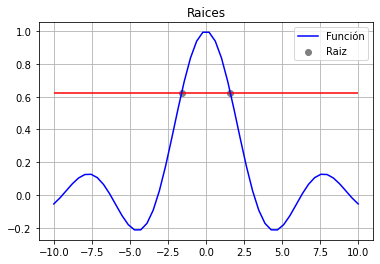

In [184]:

r=np.array([r1,r2])
xp = linspace(-10,10)
y = f(xp) + P
#Se grafica para las dos raices. y la función 2.
plt.title('Raices')
plt.plot(xp,y, color = 'blue', label='Función')
plt.scatter(r,f(r)+P, color = 'gray', label='Raiz') 
plt.hlines(P,-10, 10, color = 'red')
plt.grid()
plt.legend()

#Gráfico
plt.show()
